# Historical Distribution of Incomes by Race

## Intro
This is the second part of the project, in which I analyze the Census data on poverty and incomes. In this part I explore the data on historical income distribution in the United States (the latest Census data available is for 2021).

#### Data
The table we work with contains the historical income distribution along with median and mean incomes for four races – white, Black, Asian, and Native American as well as for all races overall (mixed races are not included).
<br>

The income distribution is divided into nine groups by the following extreme points (in USD):
- under 15.000 a year, 

- between 15,000 and 24,999

- between 25,000 and 34,999

- between 35,000 and 49,999

- between 50,000 and 74,999

- between 75,000 and 99,999

- between 100,000 and 149,999

- between 150,000 and 199,999

- over 200,000

For convinience, the column names in the DataFrame are rounded (e.g., 25k instead of 24,999).

#### Goals & Methods
The dataset holds two pieces of information – percent distribution of incomes and median / average incomes. According to this, we set the following goals:
1. Explore the income distributions with a series of stacked bar charts and draw conclusions.
2. Show the changes in median incomes since the data started being collected.
3. Run the ____ test to ____

## Load and Clean Data

#### Import libraries and custom functions from the previous project

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [108]:
from cleaning_functions import extract_rows, change_dtypes, get_df_name

`extract_rows` – extract specified rows from the dataset. It will be used to create a number of smaller DataFrames withdrawn from the original set;<br>
`change_dtypes` – turn string values to NaNs and change all data types to float (turns every numeric to float and strings to NaN);<br>
`get_df_name` – print the name of the current DataFrame to the title (to print out some parts of the DataFrame name to the plot title).

#### Load Data

In [98]:
cols = ['year', 
          'under_15k', '15_to_25k', '25_to_35k', '35_to_50k', '50_to_75k', 
          '75_to_100k', '100_to_150k', '150_to_200k', 'over_200k', 
          'median_income', 'mean_income']

df = pd.read_excel('d2_income_dist_by_group.xlsx', skiprows=4, usecols="A, D:M, O", names=cols).iloc[0:453]

# Clean the years
change_dtypes(df)

#### Split by races

In [99]:
income_dist_all = extract_rows(df, 1, 58)
income_dist_white = extract_rows(df, 59, 117, 81)
income_dist_black = extract_rows(df, 195, 253, 217)
income_dist_asian = extract_rows(df, 277, 315, 299)
income_dist_native = extract_rows(df, 339, 377, 361)
income_dist_hispanic = extract_rows(df, 401, 459)

## Explore

### 1. Percent Distribution of Incomes for American Households across Five Race Groups

Out first step is to create a stacked bar plot to display the percentile distribution of incomes for five race groups in 2021. First, we need our y-values that are percentiles for the groups (year 2021). To get them we iterate through two indices. First to fetch values from the first rows  of five race DataFrames (stored in a list). Second index assigns a corresponding percentile of a race group to the array. Then we transpose the array so each row would hold values a certain percentile values of all the groups.

In [100]:
cols_pct = cols[1:-2]
df_list = [income_dist_white.iloc[0], income_dist_black.iloc[0], income_dist_asian.iloc[0], income_dist_native.iloc[0], income_dist_hispanic.iloc[0]]
y_values = np.zeros(shape=(5, 9))
for x in range(len(df_list)):
    for i in range(len(cols_pct)):
        this_col = cols_pct[i]
        y_values[x][i] = df_list[x][this_col]

y_values = y_values.T
print(y_values)

[[ 8.2 15.9  7.8 14.8 11.2]
 [ 7.6 11.7  6.  11.5  8.3]
 [ 7.6 10.   5.3  9.   9.4]
 [10.8 13.4  6.6 12.9 13.9]
 [16.2 17.  13.4 17.9 18.4]
 [12.3 10.4 10.  12.1 12. ]
 [16.6 11.4 17.7 10.6 14.3]
 [ 8.6  4.6 12.2  5.3  5.9]
 [12.1  5.7 21.1  5.9  6.6]]


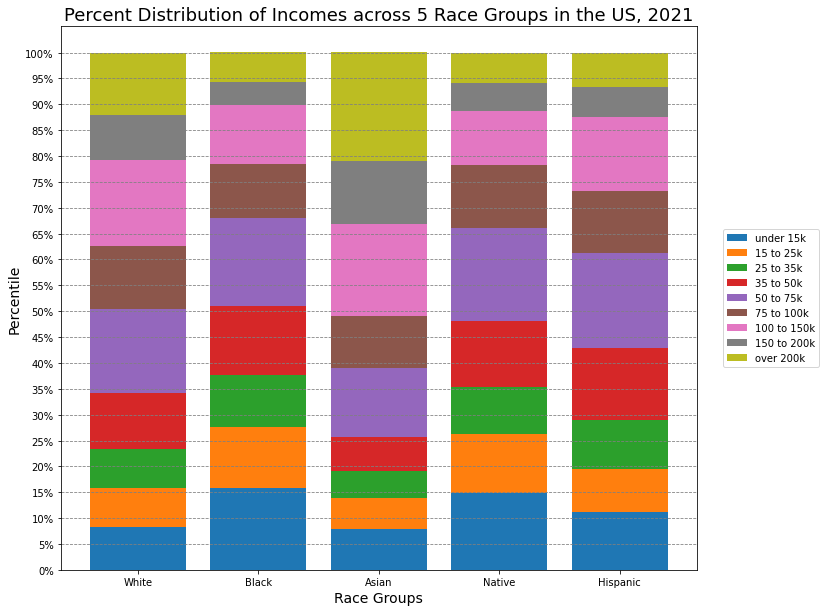

In [101]:
fig, ax = plt.subplots(1, figsize=(12, 10))

# There are 5 x values corresponding to 5 race groups
x_values = range(5)
bottom = 0

# Create 5 stacked bars with 9 colors (for 9 distribution percentile)
for i in range(y_values.shape[0]):
    plt.bar(x_values, y_values[i], bottom = bottom)
    bottom += y_values[i]

# Set the y-label (all the percentiles sum up tp 100%) and the x-label
yticks = np.arange(0,101,5)
ylabels = [f'{i}%' for i in yticks]
plt.yticks(yticks, ylabels)
ax.yaxis.grid(color='gray', linestyle='dashed')

ax.set_xticks([x for x in x_values])
ax.set_xticklabels(['White', 'Black', 'Asian', 'Native', 'Hispanic'])


# Setting a legend. For that we clean and use the cols_pct variable
# To place the legend outside of the plot, shrink the size of the plot (ax.set_position) 
# and use the bbox_to_anchor which allowing choosing arbitrary location of the legend
legend = [i.replace('_', ' ') for i in cols_pct]
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.95, pos.height])
ax.legend(legend, loc='center right', bbox_to_anchor=(1.2, 0.5))

# Title, x and y labels
plt.title("Percent Distribution of Incomes across 5 Race Groups in the US, 2021", fontsize = 18)
plt.xlabel("Race Groups", fontsize = 14)
plt.ylabel("Percentile", fontsize = 14)

plt.show()

With this plot, we can see differences in welfare of different race groups. <br>
For example, the first four percentiles take up more than 50% of the bar in the Black group and only 25% in the Asian group. That means, that half of the Black population and a quarter of the Asian population earns 50,000 USD or less. <br>
At the same time, more than 50% of Asian Americans have income of more than 100,000 USD (comparing to little more than 20% for Black people and Native Americans).

### 2. Historical Median Income across Five Race Groups

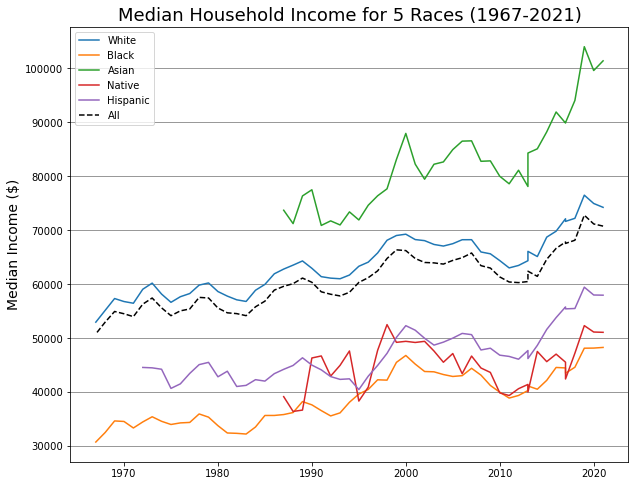

In [128]:
fig, ax = plt.subplots(1, figsize=(10, 8))

df_list = [income_dist_white, income_dist_black, income_dist_asian, income_dist_native, income_dist_hispanic]
legend_list = []
for data in df_list:
    plt.plot(data['year'], data['median_income'])
    
plt.plot(income_dist_all['year'], income_dist_all['median_income'], linestyle='dashed', c='k')    
ax.yaxis.grid(color='gray')

plt.legend(['White', 'Black', 'Asian', 'Native', 'Hispanic', 'All'])
plt.title('Median Household Income for 5 Races (1967-2021)', fontsize=18)
plt.ylabel('Median Income ($)', fontsize=14)
plt.show()

From the chart, we can see that the incomes have been steadily growing for most of the groups and overall. <br>
For the Native American, their median household income is the most flactuatng, It was two times below 40,000 and above 50,000 USD over the course of 30 years. <br>
The main evidence we can draw out from the chart is – again – stark inequality between different races. Incomes of white people has been consistently more than 1.5 times bigger than of Black people. 

### 3. 

## Conclusion
#### What's done
#### Key findings